# To a better body mass index

Body mass index has for years been the golden standard to cheaply predict a persons general fitness (fat percentage).

The general formula:

$BMI = weight/height^2$.

Although from a dimensional point of view it seems more logic that the height is put to a third power. 

First the predicting power of the BMI formula for the fat percentage is evaluated.

Secondly this notebook looks into if another power delivers better results, something that intuitevly seems to be the case.

Lastly and more generically this notebook looks into the broader possiblity of better predciting the body fat percentage based on cheaply available data like weight, height, age and gender.

# Load in data

In [3]:
# import necessary packages
import numpy as np
import pandas as pd
import random
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [4]:
uploaded = files.upload() 

Saving bodyfat.csv to bodyfat.csv


In [5]:
bodyfat_men = pd.read_csv(io.BytesIO(uploaded["bodyfat.csv"])) # fill in the name of the file between "...."
bodyfat_men.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [6]:
#weight is in pounds
POUND2KG = 0.453592
INCH2M = 2.54 /100

In [7]:
bodyfat_men["Height"] = bodyfat_men["Height"] * INCH2M 
bodyfat_men["Weight"] = bodyfat_men["Weight"] * POUND2KG 


In [8]:
bodyfat_men.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,69.966566,1.72085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.584814,1.83515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.853168,1.68275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.801122,1.83515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.574326,1.80975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,95.367718,1.89865,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,82.100152,1.77165,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,79.832192,1.84150,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,86.636072,1.87960,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,89.924614,1.86690,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


## Exploratory data analysis

Text(0.5, 1.0, 'Histogram of fat percentage')

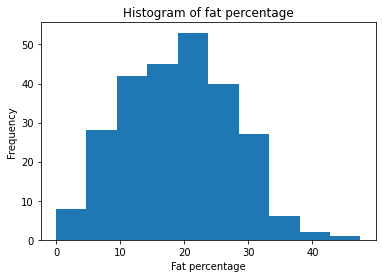

In [9]:
# gain more insight in the target distribution
import matplotlib.pyplot as plt

BodyFat = bodyfat_men["BodyFat"]
plt.hist(BodyFat, bins = 10)
plt.xlabel('Fat percentage')
plt.ylabel('Frequency')
plt.title('Histogram of fat percentage')



## The predictive power of BMI

In [73]:
bodyfat_men["BMI"] = bodyfat_men.apply(lambda x: x["Weight"]/(x["Height"]*x["Height"]),axis=1)
print(bodyfat_men["BMI"] )

0      23.626779
1      23.334338
2      24.668737
3      24.883227
4      25.517358
         ...    
247    21.026290
248    29.047288
249    30.141905
250    26.982629
251    29.772820
Name: BMI, Length: 251, dtype: float64


Text(0.5, 1.0, 'Histogram of fat percentage')

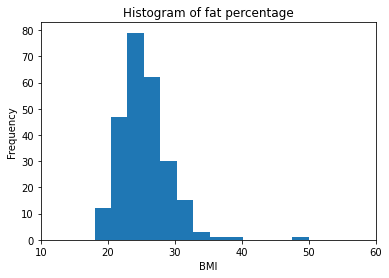

In [11]:
BMI = bodyfat_men["BMI"]
plt.hist(BMI, bins = 60)
plt.xlabel('BMI')
plt.xlim(10,60)
plt.ylabel('Frequency')
plt.title('Histogram of fat percentage')


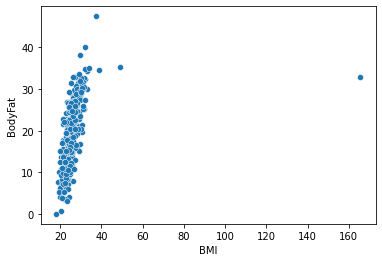

In [12]:
# how good is the relationship between BMI and fat percentage

sns.scatterplot(x= bodyfat_men["BMI"], y= bodyfat_men["BodyFat"])

In [13]:
# the person with a BMI higher then 160 looks peculiar. He will be researched more
bodyfat_men[bodyfat_men["BMI"] > 140]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
41,1.025,32.9,44,92.98636,0.7493,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.618094


The man is 0.7m high and weights 92kg which is extreme on the verge of not possible and the datapoint will therefore be eliminated

In [14]:
bodyfat_men = bodyfat_men[bodyfat_men["BMI"] < 140]

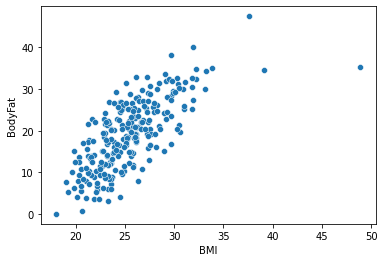

In [15]:
# print again the filtered data
import seaborn as sns

sns.scatterplot(x= bodyfat_men["BMI"], y= bodyfat_men["BodyFat"])

A linear relationship can be observed. In the later part of this chapter we will examine the predictive power of the BMI index by linear regression.

In [16]:
y = bodyfat_men["BodyFat"].values.reshape(-1, 1)
X = bodyfat_men["BMI"].values.reshape(-1, 1)
 # split in a train set and a test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [70]:
print( "average mistake in abs :" + str(abs(reg.predict(X_test)-y_test).mean()) + " percentage points")
print( "the standard deviation :" + str(abs(reg.predict(X_test)-y_test).std()))

average mistake in abs :4.676529321703388 percentage points
the standard deviation :3.7534883668316463


Text(0.5, 1.0, 'Fat percentage')

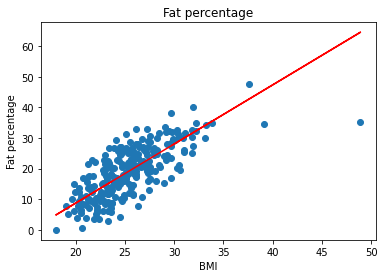

In [18]:
#lets plot our best linear fit
Y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')

plt.xlabel('BMI')
plt.ylabel('Fat percentage')
plt.title('Fat percentage')

In [23]:
# how far are the predictions on average 
from sklearn.model_selection import cross_val_score

reg2 = LinearRegression()

scores = cross_val_score(reg2, X, y, scoring = "r2", cv=10)
print(scores)
print( "average mistake in abs :" + str(abs(reg.predict(X_test)-y_test).mean()) + " percentage points")
print( "the standard deviation :" + str(abs(reg.predict(X_test)-y_test).std()))

[-0.03214002  0.58066444  0.63685009  0.07072309 -0.20511273  0.30365113
  0.54791896  0.4994266   0.62702454  0.63921876]
average mistake in abs :4.600927108657334 percentage points
the standard deviation :4.090215643837529


On average the linear regression with the established BMI formula makes a mistake of 4.6 percentage points 

## Tweaking the BMI formula

In [24]:
bodyfat_men["BMI_2"] = bodyfat_men.apply(lambda x: x["Weight"]/(x["Height"]*x["Height"]*x["Height"]),axis=1)

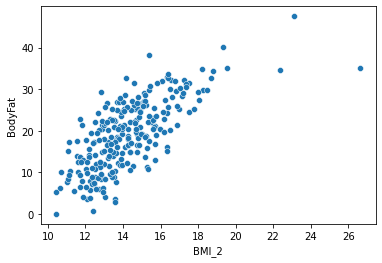

In [25]:
sns.scatterplot(x= bodyfat_men["BMI_2"], y= bodyfat_men["BodyFat"])

In [26]:
y = bodyfat_men["BodyFat"].values.reshape(-1, 1)
X = bodyfat_men["BMI_2"].values.reshape(-1, 1)
 # split in a train set and a test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Fat percentage')

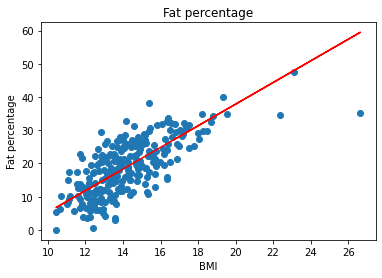

In [28]:
#lets plot our best linear fit
Y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')

plt.xlabel('BMI')
plt.ylabel('Fat percentage')
plt.title('Fat percentage')

In [29]:
# how far are the predictions on average 
print( "average mistake in abs :" + str(abs(reg.predict(X_test)-y_test).mean()) + " percentage points")
print( "the standard deviation :" + str(abs(reg.predict(X_test)-y_test).std()))

average mistake in abs :4.676529321703388 percentage points
the standard deviation :3.7534883668316463


On average the prediction is about the same as for the prevous place, but the standard deviation is reduced.

Can we find an optimal power?

In [66]:
power = np.arange(0,4,0.1) # the powers we will test out

In [84]:
def find_optimal_power(height, weight,y, power):
  error_opt = 100000000 # choose a big number
  power_opt = 0
  for i in power:
    BMI_new = weight/np.power(height, i)
    X_train, X_test, y_train, y_test = train_test_split(BMI_new, y, test_size=0.33, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    error = abs(reg.predict(X_test)-y_test).mean()
    print( "power: " + str(i) + ", error: " +str(error))

    if error < error_opt:
      error_opt = error
      power_opt = i

  return power_opt, error_opt
    

  

In [76]:
height = bodyfat_men["Height"].values.reshape(-1, 1)
weight = bodyfat_men["Weight"].values.reshape(-1, 1 )

y = bodyfat_men["BodyFat"].values.reshape(-1, 1)

In [85]:
print( type(height))

find_optimal_power(height, weight, y, power)


<class 'numpy.ndarray'>
power: 0.0, error: 5.017076738670015
power: 0.1, error: 5.003678091450672
power: 0.2, error: 4.987896037734726
power: 0.30000000000000004, error: 4.971850614519636
power: 0.4, error: 4.954730400137394
power: 0.5, error: 4.9378187636897115
power: 0.6000000000000001, error: 4.921207693200777
power: 0.7000000000000001, error: 4.903896144125484
power: 0.8, error: 4.883836510578178
power: 0.9, error: 4.860983953592101
power: 1.0, error: 4.838320333355632
power: 1.1, error: 4.816097909970399
power: 1.2000000000000002, error: 4.797025578938261
power: 1.3, error: 4.775765812753351
power: 1.4000000000000001, error: 4.756113587894851
power: 1.5, error: 4.736386327708015
power: 1.6, error: 4.714104862285057
power: 1.7000000000000002, error: 4.689327074148146
power: 1.8, error: 4.6621333378588545
power: 1.9000000000000001, error: 4.6326257884352655
power: 2.0, error: 4.600927108657334
power: 2.1, error: 4.590494692833597
power: 2.2, error: 4.594394409127235
power: 2.3000000

(2.1, 4.590494692833597)

The best best prediction indeed seems to be around the power 2, but one can notice that the power even doesn't seem to be a very impactfull. To the zero power only delivers on average a 0.5 prentagepoint better result.

### What about the animal kingdom can the same relationships be observed
Animals in general live in hardship and it can be assumed that the bodyfat percentage will be constant for all of them. Still have to find good data on this... A work in progress :)


## Finding a better predictive model

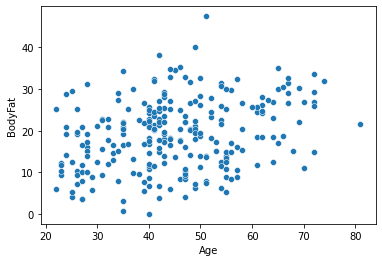

In [86]:
# Age also must be strongly correlated to bodyfat as the metabolism slows down. In the following paragraph this relationship is further studied.
sns.scatterplot(x= bodyfat_men["Age"], y= bodyfat_men["BodyFat"])

At sight there does not seem to be string correlation going 

In [ ]:
# we look if a better regression model can be found